In [3]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, wilcoxon, ttest_rel
from scipy import stats
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
list1=[57, 103, 59, 75, 84, 73, 35, 110, 44, 82, 67, 64, 78, 53, 41, 39, 80, 87, 73, 65, 28, 62, 49, 84, 63, 77, 67, 101, 91, 50]
list2=[62, 122, 54, 82, 84, 86, 32, 104, 38, 107, 84, 85, 99, 39, 34, 58, 73, 53, 66, 78, 41, 71, 38, 95, 81, 58, 75, 94, 100, 68]

In [5]:
old_scheme=(np.array(list1))*1000
new_scheme=(np.array(list2))*1000

In [6]:
old_scheme.shape

(30,)

(array([2., 3., 2., 3., 6., 4., 5., 2., 1., 2.]),
 array([ 28000.,  36200.,  44400.,  52600.,  60800.,  69000.,  77200.,
         85400.,  93600., 101800., 110000.]),
 <a list of 10 Patch objects>)

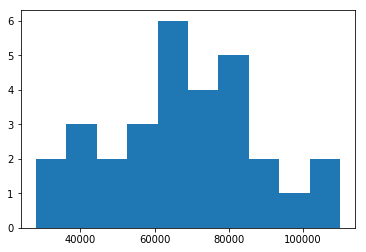

In [7]:
plt.hist(old_scheme)

In [8]:
new_scheme.shape

(30,)

(array([5., 1., 4., 2., 4., 6., 2., 3., 2., 1.]),
 array([ 32000.,  41000.,  50000.,  59000.,  68000.,  77000.,  86000.,
         95000., 104000., 113000., 122000.]),
 <a list of 10 Patch objects>)

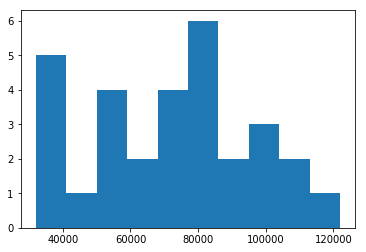

In [9]:
plt.hist(new_scheme)

In [10]:
#Find the mean of old scheme and new scheme column
old_schememean=np.mean(old_scheme)
new_schememean=np.mean(new_scheme)
print(old_schememean, new_schememean)

68033.33333333333 72033.33333333333


In [11]:
#Use the five percent significance test over the data to determine the p value to check new scheme has significantly raised outputs?
#I am using three approaches for the first question.
#1. ttest for paired samples assuming that the distrbution is normal.
t_stat, p_value=ttest_1samp(new_scheme-old_scheme, 0)
print(t_stat,p_value)

1.5559143823544377 0.13057553961337662


In [12]:
#Assuming that the above mentioned distribution is not normal, we then use the 'wilcoxon' function.
z_stat,pvalue=wilcoxon(new_scheme-old_scheme)
print(z_stat, pvalue)

131.0 0.06116952762758769


In [13]:
#we can also use the relative test to determine the pvalue for paired samples.
stat,pval=ttest_rel(new_scheme, old_scheme)
print(stat,pval)

1.5559143823544377 0.13057553961337662


In [14]:
#What conclusion does the test (p-value) lead to?
#Based on the above tests, we can see that the Pvalue is greater than the level of significance which is 0.05, hence, we do not reject the null hypothesis.
#This means that there is no significant difference the two samples even after the introduction of the new scheme.

In [15]:
#Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000 in the scheme compared to the old scheme. 
#If this figure is alternative hypothesis, what is:
#The probability of a type 1 error?
#The probability of the Type-1 error is equal to the level of significance which is 0.05.

In [19]:
#What is the p- value of the hypothesis test if we test for a difference of $5000?
#Mean of old scheme - M0
#Mean of new scheme - M1
#H0:M1-M0<50000 - Null Hypothesis
#H1:M1-M0>5000 - Alternate Hypothesis
#The alternate hypothesis is the difference between the mean of the new and the old scheme is greater than 5000.
stat,pval=ttest_rel(new_scheme, old_scheme)
print(stat,pval)
pvalue=1-pval
pvalue
#since the p value is greater than alpha which is 0.05, we accept the null hypothesis, which means that the difference between the means is less than 5000.

1.5559143823544377 0.13057553961337662


0.8694244603866234

In [ ]:
#Power of the test

In [93]:
5000/np.sqrt(((30-1)*var1+(30-1)*var2)/11+11-2)

0.09917090673878495

In [95]:
print(ttest_power(0.099, nobs=30, alpha=0.05))

0.08206476089689695
